In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit

In [3]:
todo=pd.ExcelFile("Datos/Vida_setenta_Hijueputa.xlsx")

In [4]:
todo.sheet_names

['Calibración', 'Zeeman', 'rabii', 'Nuevo_rabi']

In [13]:
Zeeman=pd.read_excel(todo,sheet_name='Zeeman').dropna(how='all')
Zeeman["Error_corriente"] = np.ones(len(Zeeman))*0.001
Zeeman["Error_frecuencia"] = np.ones(len(Zeeman))*5

In [14]:
def model(x,a,b):
    return a*x+b

In [15]:
x_obs_1 = np.array(Zeeman["Corriente pico 1 (A)"])
x_obs_2 = np.array(Zeeman["Corriente pico 2"])
y_obs = np.array(Zeeman["Frecuencia (kHz)"])
y_err=np.array(Zeeman["Error_frecuencia"])
popt_1, pcov_1 = curve_fit(model, x_obs_1, y_obs,sigma=y_err,absolute_sigma= True)
popt_2, pcov_2 = curve_fit(model, x_obs_2, y_obs,sigma=y_err,absolute_sigma= True)
perr_1 = np.sqrt(np.diag(pcov_1))
perr_2 = np.sqrt(np.diag(pcov_2))
R2_1=np.abs(pcov_1[1,0]/np.sqrt(pcov_1[0,0]*pcov_1[1,1]))
R2_2=np.abs(pcov_2[1,0]/np.sqrt(pcov_2[0,0]*pcov_2[1,1]))

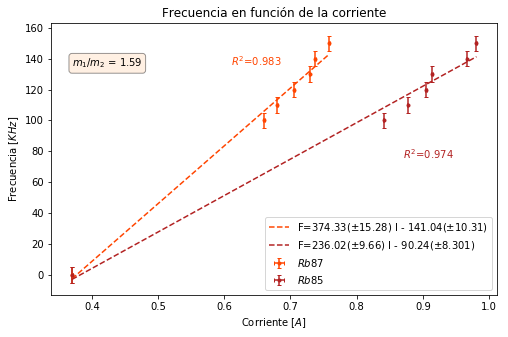

In [16]:
plt.figure(figsize=(8,5))
x_1=np.linspace(min(x_obs_1),max(x_obs_1))
x_2=np.linspace(min(x_obs_2),max(x_obs_2))
plt.plot(x_1,model(x_1,*popt_1),linestyle="--",color="orangered",label=r"F={}($\pm${}) I {} {}($\pm${})".format(round(popt_1[0],2),
                                                                                    round(perr_1[0],2),"+" if popt_1[1]>0 else "-",
                                                                                    round(np.abs(popt_1[1]),2),round(perr_1[1],2)))
plt.errorbar(x_obs_1,y_obs,yerr=np.array(Zeeman["Error_frecuencia"]),xerr=np.array(Zeeman["Error_corriente"]),fmt=".",capsize=2,color="orangered",label=r"$Rb87$")
plt.plot(x_2,model(x_2,*popt_2),linestyle="--",color="firebrick",label=r"F={}($\pm${}) I {} {}($\pm${})".format(round(popt_2[0],2),
                                                                                    round(perr_2[0],2),"+" if popt_2[1]>0 else "-",
                                                                                    round(np.abs(popt_2[1]),2),round(perr_2[1],3)))
plt.errorbar(x_obs_2,y_obs,yerr=np.array(Zeeman["Error_frecuencia"]),xerr=np.array(Zeeman["Error_corriente"]),fmt=".",capsize=2,color="firebrick",label=r"$Rb85$")
plt.text(min(x_obs_1)+0.24, 0.9*max(y_obs), r'$R^2$={}'.format(round(R2_1,3)),color="orangered")
plt.text(min(x_obs_2)+0.5, 0.5*max(y_obs), r'$R^2$={}'.format(round(R2_2,3)),color="firebrick")
plt.text(min(x_obs_2),0.9*max(y_obs),"$m_1/m_2$ = {}".format(round(popt_1[0]/popt_2[0],2))
         ,bbox=dict(facecolor='peachpuff', alpha=0.4,boxstyle="round"))
plt.xlabel(r"Corriente [$A$]")
plt.ylabel(r"Frecuencia [$KHz$]")
plt.legend()
plt.title("Frecuencia en función de la corriente")
plt.savefig("Figuras/Freq_corr.png")
plt.show()

In [9]:
Rabi=pd.read_excel(todo,sheet_name='Nuevo_rabi').dropna(how='all')
error_Vpp=1.5
Rabi["Error_1/Vpp"] = error_Vpp/(np.array(Rabi["Vpp"])**2)
Rabi["Error_tiempo"] = np.ones(len(Rabi))*0.1

In [10]:
x_obs_1 = np.array(Rabi["t(ms) 0,660"])
x_obs_2 = np.array(Rabi["t(ms) 0,838"])
y_obs = 1.0/np.array(Rabi["Vpp"])
y_err = np.array(Rabi["Error_1/Vpp"])
popt_1, pcov_1 = curve_fit(model, x_obs_1, y_obs,sigma=y_err,absolute_sigma= True)
popt_2, pcov_2 = curve_fit(model, x_obs_2, y_obs,sigma=y_err,absolute_sigma= True)
perr_1 = np.sqrt(np.diag(pcov_1))
perr_2 = np.sqrt(np.diag(pcov_2))
R2_1=np.abs(pcov_1[1,0]/np.sqrt(pcov_1[0,0]*pcov_1[1,1]))
R2_2=np.abs(pcov_2[1,0]/np.sqrt(pcov_2[0,0]*pcov_2[1,1]))

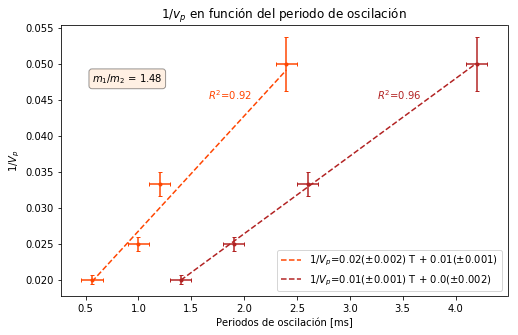

In [11]:
plt.figure(figsize=(8,5))
x_1=np.linspace(min(x_obs_1),max(x_obs_1))
x_2=np.linspace(min(x_obs_2),max(x_obs_2))

plt.plot(x_1,model(x_1,*popt_1),linestyle="--",color="orangered",label=r"$1/V_p$={}($\pm${}) T {} {}($\pm${})".format(round(popt_1[0],2),
                                                                                    round(perr_1[0],3),"+" if popt_1[1]>0 else "-",
                                                                                    round(np.abs(popt_1[1]),2),round(perr_1[1],3)))
plt.errorbar(x_obs_1,y_obs,yerr=np.array(Rabi["Error_1/Vpp"]),xerr=np.array(Rabi["Error_tiempo"]),fmt=".",capsize=2,color="orangered")
plt.plot(x_2,model(x_2,*popt_2),linestyle="--",color="firebrick",label=r"$1/V_p$={}($\pm${}) T {} {}($\pm${})".format(round(popt_2[0],2),
                                                                                    round(perr_2[0],3),"+" if popt_2[1]>0 else "-",
                                                                                    round(np.abs(popt_2[1]),2),round(perr_2[1],3)))

plt.errorbar(x_obs_2,y_obs,yerr=np.array(Rabi["Error_1/Vpp"]),xerr=np.array(Rabi["Error_tiempo"]),fmt=".",capsize=2,color="firebrick")

plt.text(min(min(x_obs_1),min(x_obs_2))+1.1,0.9 *max(y_obs), r'$R^2$={}'.format(round(R2_1,2)),color="orangered")
plt.text(min(min(x_obs_1),min(x_obs_2))+2.7, 0.9*max(y_obs), r'$R^2$={}'.format(round(R2_2,3)),color="firebrick")
plt.text(min(min(x_obs_1),min(x_obs_2)),0.95*max(y_obs),"$m_1/m_2$ = {}".format(round(popt_1[0]/popt_2[0],2))
         ,bbox=dict(facecolor='peachpuff', alpha=0.4,boxstyle="round"))
plt.xlabel(r"Periodos de oscilación [ms]")
plt.ylabel(r"$1/V_p$")
plt.legend()
plt.title(r"$1/v_p$ en función del periodo de oscilación")
plt.savefig("Figuras/Voltaje_pp_periodo.png")
plt.show()